###### import data and deleting column 'NO' and changing the index range of rows.


In [ ]:
data_path = '/content/Life Expectancy Data.csv'
Data = pd.read_csv(data_path)
Data.index = range(1, len(Data) + 1)
Data.columns = Data.columns.str.strip()
Data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data preprocessing



 # A.	Explore and clean the dataset. Explain your steps and reasons behind your actions (such as choosing a specific imputation technique).




#### We have 2938 rowes and 22 features in this dataset

In [ ]:
Data.shape

(2938, 22)

#### In the output of this code, we can see what range of values ​​each quantitative and qualitative variable of the data set is in.


In [ ]:
unique_values = {col: Data[col].unique()[:30] for col in Data.columns}
for col, values in unique_values.items():
    print(f"{col}: {values}")

Country: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia']
Year: [2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]
Status: ['Developing' 'Developed']
Life expectancy: [65.  59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 57.  56.7 56.2 55.3 54.8
 77.8 77.5 77.2 76.9 76.6 76.2 76.1 75.3 75.9 74.2 73.5 73.  72.8 73.3
 73.6 72.6]
Adult Mortality: [263. 271. 268. 272. 275. 279. 281. 287. 295. 291. 293.   3. 316. 321.
  74.   8.  84.  86.  88.  91.   1.   9.  99.  15.  17.  18.  14.  11.
  19. 112.]
infant deaths: [62 64 66 69 71 74 77 80 82 84 85 87 88  0  1 21 20 19 67 72 75 78 81 90
 92 94 95 96 97  8]
Alcohol: [0.01 0.03 0.

In [ ]:
Data.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
HIV/AIDS                            200
GDP                                2490
Population                         2278
thinness  1-19 years                200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

#### At this stage, we have an overview of a type of dataset features.All are slightly continuous except variable ' Country' and 'Status'.


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 1 to 2938
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

#### The frequency of 'Country' and 'Status' variable values ​​is reported as the only qualitative variables.


In [ ]:
country_frequency = Data['Country'].value_counts()
status_frequency = Data['Status'].value_counts()

country_frequency, status_frequency

(Country
 Afghanistan              16
 Peru                     16
 Nicaragua                16
 Niger                    16
 Nigeria                  16
                          ..
 Niue                      1
 San Marino                1
 Nauru                     1
 Saint Kitts and Nevis     1
 Dominica                  1
 Name: count, Length: 193, dtype: int64,
 Status
 Developing    2426
 Developed      512
 Name: count, dtype: int64)

####In the output below, it is shown for each feature how many missing data there are, and according to the output, these data should be filled with imputation techniques.

In [ ]:
missing_values = Data.isnull().sum()
missing_values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

####Missing values ​​in each specified feature are filled with the average of each feature. Considering the total size of dataset, the number of missing data is not so high.

In [ ]:
columns_to_fill = ['Life expectancy', 'Adult Mortality', 'Alcohol', 'BMI', 'Polio','Hepatitis B',
                   'Total expenditure', 'Diphtheria','GDP','Population', 'thinness  1-19 years',
                   'thinness 5-9 years', 'Income composition of resources', 'Schooling']

for column in columns_to_fill:
    Data[column].fillna(Data[column].mean(), inplace=True)

updated_missing_data = Data.isnull().sum()
updated_missing_data


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

#### There are no duplicate rows and the shape of the data has not changed.


In [ ]:
Data.drop_duplicates().shape

(2938, 22)

##descriptive_statistics

In [ ]:
descriptive_statistics = Data.drop(columns=['Year', 'Country']).describe()
descriptive_statistics

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# B.	Visualize your data to gain better insights. Explain your findings.

## Univariate charts

## Draw a  for chart the qualitative feature

#### Since most of the graph is blue, it can be concluded that a significant number of countries are "developing" rather than "developed".

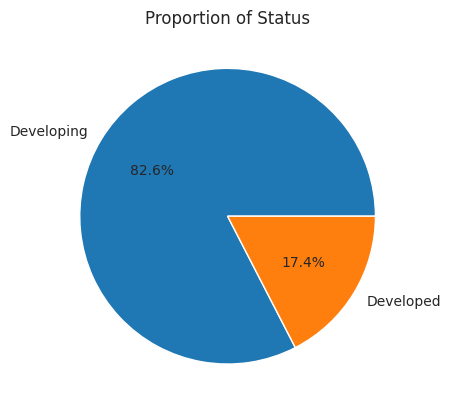

In [ ]:
Data['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Proportion of Status')
plt.show()
plt.show()

<BarContainer object of 2 artists>

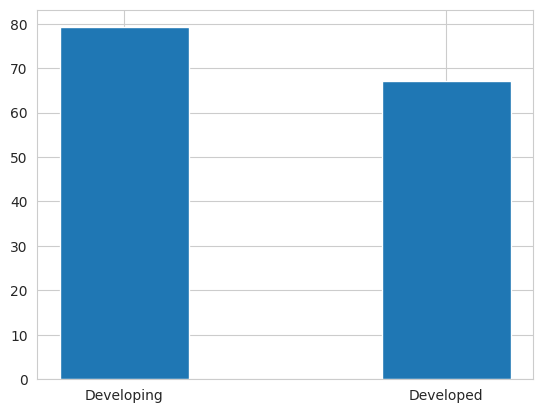

In [ ]:
Data2 = Data.groupby('Status').mean(numeric_only=True)
Data2
status = ('Developing','Developed')
A1 = Data2['Life expectancy']
plt.bar(status, A1,width=0.4)

#### bar CHART of average life expectancy by state shows that average life expectancy differs between developed and developing countries. The scatter PLOT of life expectancy against alcohol consumption shows that there was no linear relationship between alcohol consumption and life expectancy. The histogram of the life expectancy distribution shows that the data is slightly deviated from the thermal distribution. In Histogram of most features, it can be seen that the data distribution does not follow the normal distribution and is skewed to the right or left, that is, a large number of data have adopted the max or min values, or there are outliers at the beginning or end of the normal tails. This data should be deleted

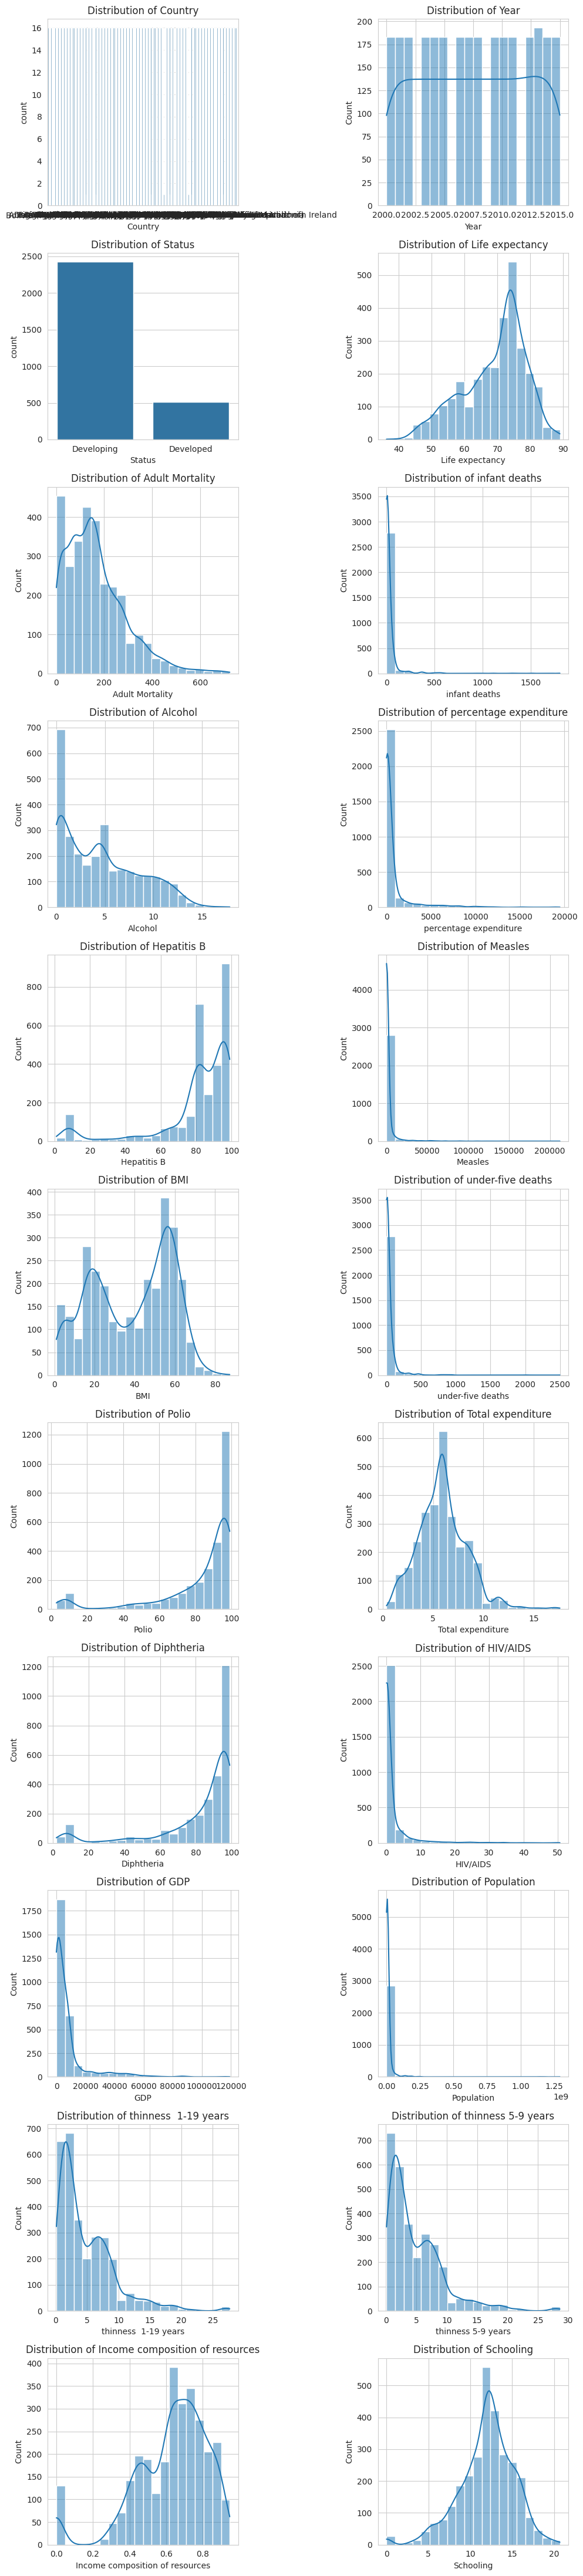

In [ ]:
sns.set_style("whitegrid")
all_columns =Data.columns
n_rows = (len(all_columns) + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(10, n_rows*4))
axes = axes.flatten()

for i, column in enumerate(all_columns):
    if Data[column].dtype == 'object':
        sns.countplot(x=column, data=Data, ax=axes[i])
    else:
        sns.histplot(Data[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()

if len(all_columns) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()


#### The scatter diagram shows that between life expectancy and GDP has a direct linear relationship. As production increases, life expectancy increases

In [ ]:
fig = px.scatter(Data, x='GDP', y='Life expectancy', log_x=True,
                 title='Life Expectancy vs GDP (Log Scale on GDP)',
                 labels={'GDP': 'GDP (Log Scale)', 'Life expectancy': 'Life Expectancy'},
                 hover_data=['Country', 'GDP', 'Life expectancy'])
fig.update_layout(
    xaxis_title='Gross Domestic Product (GDP)',
    yaxis_title='Life Expectancy',
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=True,
        zeroline=True,
        showline=True,
        showticklabels=True,
    ),
    autosize=True,
    margin=dict(
        autoexpand=True,
        l=100,
        r=20,
        t=110,),showlegend=True,plot_bgcolor='white')
fig.show()


#### There are no duplicate rows and the shape of the data has not changed.


In [ ]:
Data.drop_duplicates()
Data.shape

(2938, 22)

In [ ]:
qualitative_threshold = 20
for col in Data.columns:
    if Data[col].dtype == 'object' or (Data[col].dtype in ['int64', 'float64'] and Data[col].nunique() < qualitative_threshold):
        frequency = Data[col].value_counts()
        print(f"frequency {col}:\n{frequency}\n")


frequency Country:
Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64

frequency Year:
Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64

frequency Status:
Status
Developing    2426
Developed      512
Name: count, dtype: int64



# Check for outliers

In [ ]:
def replace_outliers_with_median(df):
    df_out = df.copy()
    for column_name in df.select_dtypes(include=[np.number]).columns:
        mean = df[column_name].mean()
        std_dev = df[column_name].std()
        mean = df[column_name].mean()
        outliers = (df[column_name] < (mean - 3*std_dev)) | (df[column_name] > (mean + 3*std_dev))
        df_out.loc[outliers, column_name] = mean
    return df_out
Data_filtered = replace_outliers_with_median(Data)

## i.	Investigate the relationship between Status (Developed vs. Developing) and the prevalence of a disease (for example, "Hepatitis B" vaccination rates).

####T-test is used to compare the mean of two groups. According to the T statistic, there is a difference in the average coverage of hepatitis B vaccination between the two groups, and its large distance from 0 indicates a greater difference between these two groups. According to the value of P VALUE, which is less than 0.05, the hypothesis H0 means that there is no difference between the two groups, and therefore there is a significant difference between the two groups.Considering the positive t-statistic and very low p-value, it can be concluded that the average hepatitis B vaccination coverage in developed countries is significantly higher than in developing countries.

In [ ]:
Q1 = Data[Data['Status'] == 'Developed']['Hepatitis B']
Q2 = Data[Data['Status'] == 'Developing']['Hepatitis B']

results = ttest_ind(Q1,Q2)
results

TtestResult(statistic=5.206195758785617, pvalue=2.060467671703268e-07, df=2936.0)

## ii.	Compare the life expectancy ("Life expectancy") between two groups defined by the "Status" column (Developed vs. Developing countries).

####According to the large value of the T statistic, the average life expectancy in developed countries is significantly higher than that of developing countries. According to the value of P_VALUE, the observed difference between the two groups is very significant, and the H0 assumption that the average is equal in both The group is rejected. Therefore, it can be said that the development of a country can be considered as an influential factor in the life expectancy rate.

In [ ]:
Q1 = Data[Data['Status'] == 'Developed']['Life expectancy']
Q2 = Data[Data['Status'] == 'Developing']['Life expectancy']

results = ttest_ind(Q1 , Q2)
results

TtestResult(statistic=29.805188781530223, pvalue=9.034938663789684e-171, df=2936.0)

## iii.	Compare the life expectancy ("Life expectancy") across multiple groups defined by the "Year" column.

####ANOVA test is used to compare the mean of three or more groups against a quantitative variable.According to the value of F statistic, there is a significant difference between the averages of the groups. According to the P value which is less than 0.05, the H0 assumption that the average is equal in all 3 groups is rejected and there is a significant difference between the average life expectancy between different years.

In [ ]:
years = Data['Year'].unique()
life_expectancy_by_year = [Data[Data['Year'] == year]['Life expectancy'] for year in years]

anova_results = f_oneway(*life_expectancy_by_year)
anova_results

F_onewayResult(statistic=5.827690463033029, pvalue=4.78474912361251e-12)

##iv.	Design 2 more hypothesis tests to further explore the dataset.



####According to the result of the first test and the large value of the T statistic, there is a significant and significant difference between the average mortality of adults in developed and developing countries. The value of P VALUE is less than the significance level of 0.05 and it indicates that the observed difference between the average groups is significant and the hypothesis H0 is rejected. The correlation between alcohol consumption and life expectancy is 0.39, indicating a positive and moderate correlation. This means that the higher the alcohol consumption, the higher the average life expectancy. But this relationship does not necessarily indicate a causal relationship, and there may be various other factors that are related to both alcohol consumption and life expectancy.

In [ ]:
Q1 = Data[Data['Status'] == 'Developed']['Adult Mortality']
Q2 = Data[Data['Status'] == 'Developing']['Adult Mortality']
results = ttest_ind(Q1, Q2)

results2= Data[['Alcohol', 'Life expectancy']].corr()
results, results2


(TtestResult(statistic=-17.99457740932921, pvalue=9.306102156126938e-69, df=2936.0),
                   Alcohol  Life expectancy
 Alcohol          1.000000         0.391598
 Life expectancy  0.391598         1.000000)

#C.	Calculate the correlation between each variable and the target variable ("Life expectancy")

####The features are sorted based on the degree of correlation with the target variable. As it is known, the Schooling variable has the highest correlation in the positive direction, which means that whatever The statistics of attention to academic issues will increase, and hope will also increase. Or, for example, considering the strong and negative relationship between adult mortality and hope, as the death rate increases among adults, life expectancy decreases. The population size and hepatitis index did not have a linear relationship with the target.

In [ ]:
Data2 = Data.drop(['Country', 'Status', 'Year'], axis=1)
correlation_with_target = Data2.corr()['Life expectancy'].sort_values()
correlation_with_target


Adult Mortality                   -0.696359
HIV/AIDS                          -0.556457
thinness  1-19 years              -0.472162
thinness 5-9 years                -0.466629
under-five deaths                 -0.222503
infant deaths                     -0.196535
Measles                           -0.157574
Population                        -0.019638
Hepatitis B                        0.203771
Total expenditure                  0.207981
percentage expenditure             0.381791
Alcohol                            0.391598
GDP                                0.430493
Polio                              0.461574
Diphtheria                         0.475418
BMI                                0.559255
Income composition of resources    0.692483
Schooling                          0.715066
Life expectancy                    1.000000
Name: Life expectancy, dtype: float64

####In order to check the correlation between the independent variables, the following can be mentioned: 1 to 19 years and 5 to 9 years have a strong positive correlation and only one of them can be kept in the model. Alcohol consumption and life expectancy have a relatively good positive linear relationship with each other. The gdp variable and the population do not have a linear relationship with each other and other cases..

<Axes: >

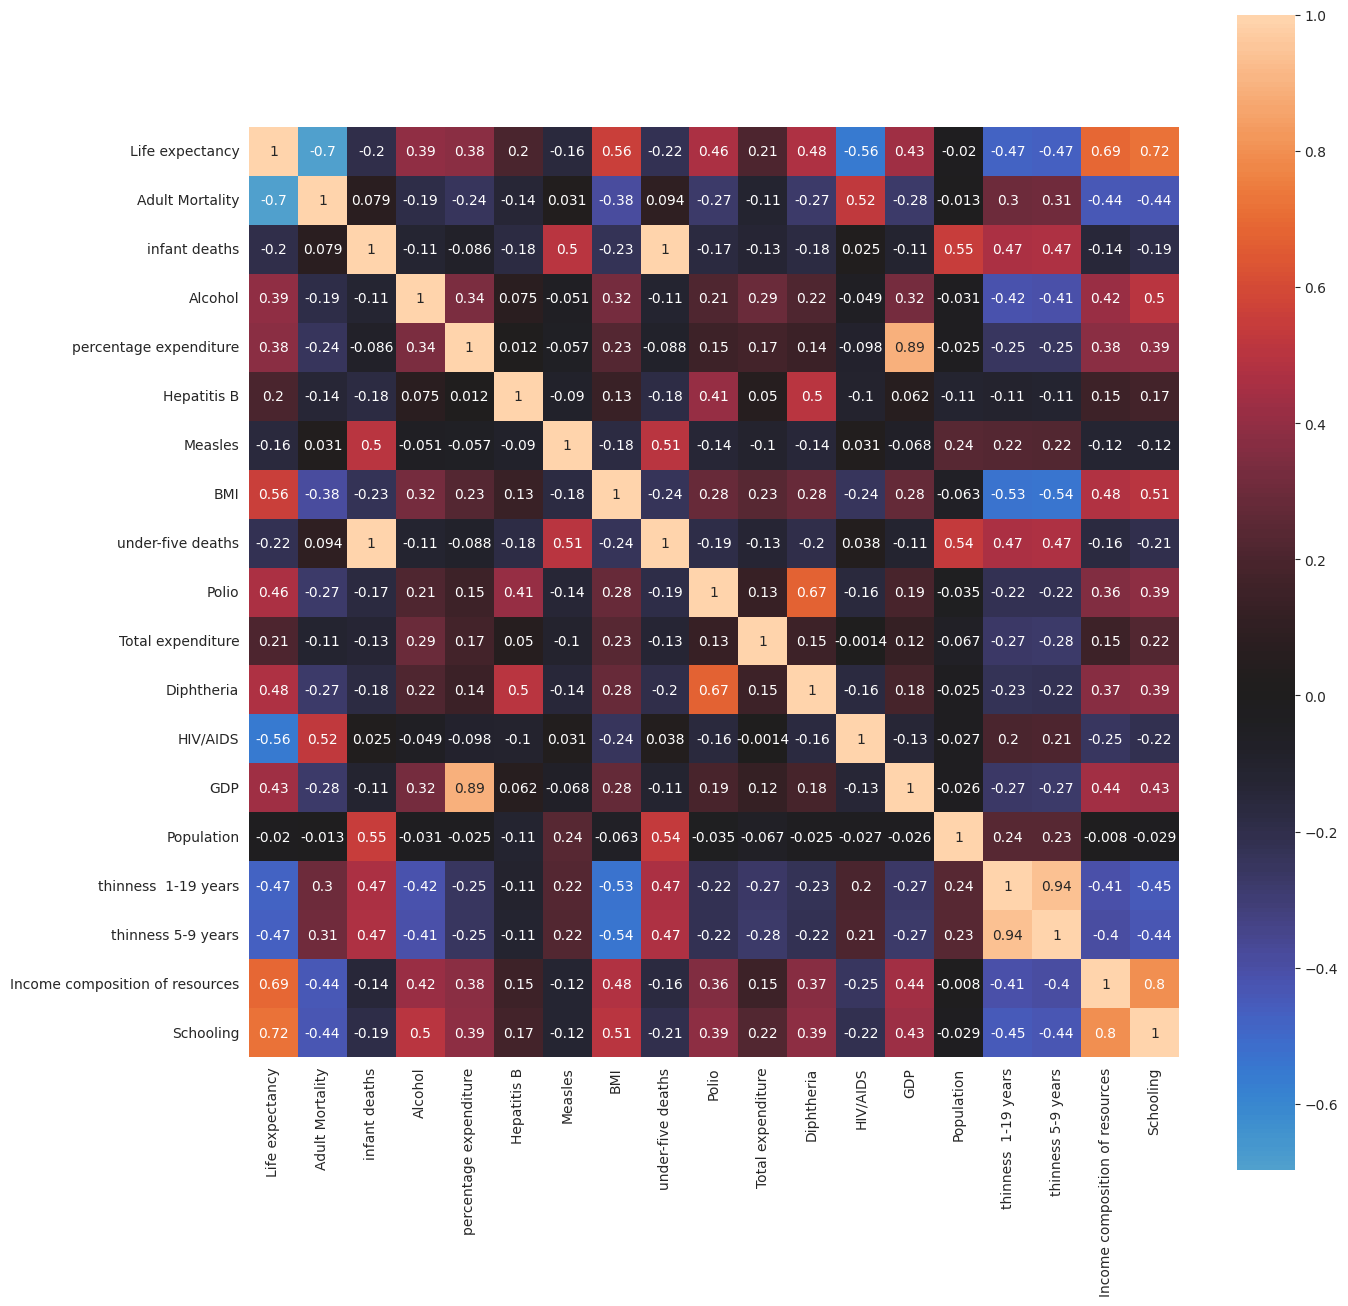

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(Data2.corr(), center=0,annot=True,square=True)

##d.	Test-train split your dataset such that there are no countries in both test and train splits. Now train two linear regression models, one including the column "Country" and another one with this column removed. How did it affect your model performance on test split? Which approach is correct?

In [ ]:
Data['Status'] = Data['Status'].apply(lambda x: 1 if x == 'Developed' else 0)
unique_countries = Data['Country'].unique()

In [ ]:
unique_countries[:30]

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia'], dtype=object)

####The data is divided into training and test sections by country to ensure that no country is present in both sections. If a country is present in both the training and test sections, the model may learn information about that country during the training process and then use the same information in the test section. This increases the accuracy of the predictions due to the model's prior knowledge of the test data, which provides an unrealistic result. Therefore, first we find all the unique values ​​in the country feature and divide them into two categories, test and train, based on the names of the countries, then by checking whether the country feature is in the test or train part of the main data for each row of data. We also categorize Now, according to the demand of the problem, we form two linear regression models (including all features except the country), one without the country feature and the other including it. By building two different models, one with and one without the "country" feature, we can examine the direct impact of this categorical feature on model accuracy.
 According to the output of the model and the amount of MSE, it can be seen that in the case without the country feature, the model error is much lower than when this feature is present in the model, and since the amount of MSE should be as minimal as possible, therefore, the absence of the country feature in the model The fitting of the model increases the accuracy and reduces the error, so this feature has not been an influential factor in the hope for the future.

 Adding more information to the model helps to improve the performance of the model. But in this case, adding country as a feature led to a significant increase in MSE. It is possible that the newly created feature did not help much in predicting average life and only increased the complexity of the model.

In addition, this model did not have a random state, and in other words, the data were not messed up.

In [ ]:
train_countries, test_countries = train_test_split(unique_countries, test_size=0.2)

train_data = Data[Data['Country'].isin(train_countries)]
test_data = Data[Data['Country'].isin(test_countries)]

X_train = train_data.drop(['Life expectancy', 'Country'], axis=1)
y_train = train_data['Life expectancy']
X_test = test_data.drop(['Life expectancy', 'Country'], axis=1)
y_test = test_data['Life expectancy']

model_without_country = LinearRegression()
model_without_country.fit(X_train, y_train)
predictions_without_country = model_without_country.predict(X_test)
mse_without_country = mean_squared_error(y_test, predictions_without_country)

X_train_with_country = train_data.drop(['Life expectancy'], axis=1)
X_test_with_country = test_data.drop(['Life expectancy'], axis=1)


categorical_features = ['Country']
numeric_features = X_train.drop('Status', axis=1).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])

model_with_country = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', LinearRegression())])

model_with_country.fit(X_train_with_country, y_train)
predictions_with_country = model_with_country.predict(X_test_with_country)
mse_with_country = mean_squared_error(y_test, predictions_with_country)

mse_without_country, mse_with_country


(13.263796083221829, 54.32401348681652)

##e.	Now test-train split the dataset randomly and perform the previous steps. How did the results change? Compare these results to part d. Which approach is correct?

####Considering the MSE values ​​and comparing it with the previous question, it is clearly clear that with the randomization of the model, the error has been significantly reduced in both cases, whether the country feature is present in the model or not. And this rate of reduction was much higher in the case that the country was included in the model, and it can be chosen as the best model.

In [ ]:
X = Data.drop(['Life expectancy', 'Country'], axis=1)
y = Data['Life expectancy']
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X, y, test_size=0.2, random_state=42)

# Model without "Country"
model_without_country_random = LinearRegression()
model_without_country_random.fit(X_train_random, y_train_random)
predictions_without_country_random = model_without_country_random.predict(X_test_random)
mse_without_country_random = mean_squared_error(y_test_random, predictions_without_country_random)

# For the model with "Country"
X_random_with_country = Data.drop(['Life expectancy'], axis=1)
y_random = Data['Life expectancy']
X_train_random_with_country, X_test_random_with_country, y_train_random_with_country, y_test_random_with_country = train_test_split(X_random_with_country, y_random, test_size=0.2, random_state=42)

model_with_country_random = Pipeline(steps=[('preprocessor', preprocessor),
                                            ('regressor', LinearRegression())])
model_with_country_random.fit(X_train_random_with_country, y_train_random_with_country)
predictions_with_country_random = model_with_country_random.predict(X_test_random_with_country)
mse_with_country_random = mean_squared_error(y_test_random_with_country, predictions_with_country_random)

mse_without_country_random, mse_with_country_random


(15.242936417992063, 3.058415638946213)

#F.	Train a simple linear regression model and another one with L1 regularization. Compare the model weights. Explain the results with the correlation values you calculated before.

#### Among the variables that affect the target, SCHOOLING the highest correlation and relationship with Life expectancy, so this variable is included in the model to form a simple linear regression model.(simple linear model between SCHOOLING and Life expectancy) In the lasso model, the estimated weight is slightly higher than when the model is only a simple linear model.
* Although the overall value of the correlation coefficient is not high!

In [ ]:
X = Data[['Schooling']]
y = Data['Life expectancy']

X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X, y, test_size=0.2, random_state=42)

simple_linear = LinearRegression()
simple_linear.fit(X_train_random, y_train_random)
simple_weights = simple_linear.coef_

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_random, y_train_random)
lasso_weights = lasso_model.coef_

print('lasso_weights:',lasso_weights,"simple_weights:", simple_weights )

lasso_weights: [1.98884227] simple_weights: [2.08334897]


#### Despite the fact that there is one feature that has the highest correlation with the target, we can see that the accuracy is not high in both models for the test data, and the model is in underfitted situation, and more variables need to be added to the model.

In [ ]:
y_pred_simple = simple_linear.predict(X_test_random)
y_pred_lasso = lasso_model.predict(X_test_random)


mse = mean_squared_error(y_test_random, y_pred_simple)
print("Mean Squared Error (MSE) of simple_linear :", mse)

r_squared = r2_score(y_test_random, y_pred_simple)
print("R-squared of simple_linear:", r_squared)


mse = mean_squared_error(y_test_random, y_pred_lasso)
print("Mean Squared Error (MSE) of lasso model :", mse)

r_squared = r2_score(y_test_random, y_pred_lasso)
print("R-squared of lasso model:", r_squared)

Mean Squared Error (MSE) of simple_linear : 39.37139175574916
R-squared of simple_linear: 0.5455501135198606
Mean Squared Error (MSE) of lasso model : 39.46163579560897
R-squared of lasso model: 0.5445084588604514
